In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [108]:
df = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/phishing_data/Training_set_label.csv" )
test_df = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/phishing_data/Testing_set_label.csv')

In [109]:
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,...,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.progarchives.com/album.asp?id=61737,46,20,zero,3,zero,0,1,0,0,1,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.108696,0.000000,0,0,0,0,0,3,0,0,0,0,0,0,...,7.5,3.750000,0,0,0,0,0,0,143,0.930070,0.069930,0,1,0,0.000000,0,0.0,0,1,73.913043,0,100.000000,0.000000,0,0,0,77.777778,0,0,0,1,one,0,627,6678,78526,0,0,5,phishing
1,http://signin.eday.co.uk.ws.edayisapi.dllsign....,128,120,0,10,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,1,0.054688,0.058333,0,0,0,0,0,3,0,0,0,0,0,0,...,10.7,0.000000,2,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0.000000,0,0.0,0,0,0.000000,0,0.000000,0.000000,0,0,0,0.000000,0,0,1,1,zero,0,300,65,0,0,1,0,phishing
2,http://www.avevaconstruction.com/blesstool/ima...,52,25,0,3,0,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,3,0,0,0,0,1,0,...,10.0,5.666667,0,0,0,0,0,0,3,1.000000,0.000000,0,0,0,0.000000,0,0.0,0,0,100.000000,0,0.000000,0.000000,0,0,0,0.000000,0,0,0,1,zero,0,119,1707,0,0,1,0,phishing
3,http://www.jp519.com/,21,13,0,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.142857,0.230769,0,0,0,0,0,2,0,1,0,0,0,0,...,4.0,0.000000,0,0,0,0,0,0,404,0.962871,0.037129,0,0,0,0.133333,0,0.0,0,0,100.000000,0,92.307692,7.692308,0,0,0,82.539683,0,0,0,1,one,0,130,1331,0,0,0,0,legitimate
4,https://www.velocidrone.com/,28,19,0,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,0,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,0,0,...,7.0,0.000000,0,0,0,0,0,0,57,0.684211,0.315789,0,3,0,0.000000,0,0.0,0,1,55.555556,0,50.000000,50.000000,0,0,0,81.081081,0,0,0,0,zero,0,164,1662,312044,0,0,4,legitimate


In [110]:
df.tail()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,...,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
11476,https://623112j4j3.codesandbox.io/index.html,44,25,0,3,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0.181818,0.32,0,0,0,0,1,3,0,0,0,0,0,0,...,10.5,4.500000,0,0,0,0,0,0,8,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,0.000000,0,0,0,0,zero,0,122,1338,22211,0,1,6,phishing
11477,http://en.academic.ru/dic.nsf/enwiki/279719,43,14,0,3,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.139535,0.00,0,0,0,0,0,3,0,0,0,0,2,0,...,5.0,4.500000,0,0,0,0,0,0,135,0.911111,0.088889,0,0,0,0.833333,0,0.416667,0,1,86.666667,0,91.666667,8.333333,0,0,0,82.608696,0,0,0,1,Zero,0,148,7158,2294,0,1,3,legitimate
11478,http://www.neutralsources.com/-/re.html,39,22,0,3,1,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.00,0,0,0,0,0,3,0,0,0,0,1,0,...,8.5,3.000000,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,0.000000,0,0.000000,0.000000,0,0,0,0.000000,0,0,1,1,zero,0,161,570,0,0,1,2,phishing
11479,http://www.pwc.com/gx/en/financial-services/fi...,114,11,0,3,6,0,0,0,0,0,0,0,0,8,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.00,0,0,0,0,0,3,1,1,0,0,1,0,...,3.0,6.384615,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,0.000000,0,0.000000,0.000000,0,0,0,0.000000,0,0,1,1,one,0,476,6828,5269,0,0,7,legitimate
11480,http://y9o5m.codesandbox.io/onedrive.html,41,20,0,3,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,1,0.048780,0.10,0,0,0,0,0,3,0,0,0,0,1,0,...,8.0,6.000000,0,0,0,0,0,0,8,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,0.000000,0,0,0,0,zero,0,123,1337,20989,0,1,6,phishing


In [111]:
test_df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,...,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,http://trendsettercorp.mosquito-digital.com/Ad...,91,36,0,2,1,0,0,0,0,0,3,0,0,4,0,1,0,0,0,0,0,0,0,0,1,0.087912,0.00000,0,0,0,0,0,2,1,0,0,0,1,0,...,9.125000,10.000000,8.600,0,0,0,0,0,0,13,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,100.0,0.0,0,0,0,100.0,0,0,0,1,one,0,568,3815,0,0,1,2
1,http://www.sciencekids.co.nz/sciencefacts/anim...,60,21,0,4,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.00000,0,0,0,0,0,3,0,0,0,0,1,0,...,7.000000,7.000000,7.000,0,0,0,0,0,0,57,0.842105,0.157895,0,0,0,0.111111,0,0.222222,1,0,33.333333,0,100.0,0.0,0,0,0,0.0,0,0,0,1,one,0,0,-1,18999,0,0,5
2,http://secureupdate.appleld.com.duilawyeryork....,118,42,1,4,0,0,1,2,0,3,2,0,0,4,0,1,0,0,0,0,0,1,0,0,1,0.152542,0.00000,0,0,0,1,0,3,0,0,0,0,1,0,...,7.833333,8.750000,7.375,0,0,0,0,0,0,51,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,100.0,0.0,0,0,0,100.0,0,0,0,1,one,0,25,3993,5707171,0,1,0
3,http://https.webmail.office.jezqmhyjbcaahq11ue...,261,212,0,13,0,1,0,0,0,0,0,0,0,6,0,1,0,0,0,0,0,1,0,0,1,0.183908,0.20283,0,0,0,0,0,3,0,1,1,0,0,0,...,13.705882,16.416667,7.200,2,0,0,0,0,0,5,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,0.000000,0,0.0,0.0,0,0,0,100.0,0,0,0,1,one,0,3183,2660,0,0,1,4
4,https://blog.zen.co.uk/?p=356,29,14,0,3,0,0,1,0,0,1,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0.103448,0.00000,0,0,0,0,0,3,0,0,0,0,0,0,...,2.750000,3.500000,2.000,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,0.000000,0,0.0,0.0,0,0,0,0.0,0,0,0,1,zero,0,2261,8756,84082,0,0,5


In [112]:
test_df.tail()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,...,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
3424,http://odino.org/the-shortest-path-problem-in-...,84,9,0,1,9,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.000000,0,0,0,0,0,1,0,0,0,0,1,0,...,5.636364,5.0,5.7,0,0,0,0,0,0,41,0.780488,0.219512,0,1,0,0.111111,0,0.222222,0,1,75.0,0,100.0,0.0,0,0,0,0.000000,0,0,0,1,one,0,300,4447,460464,0,0,4
3425,http://www.a10tech.com/img/,27,15,0,2,0,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,1,0,0,0,1,0.074074,0.133333,0,0,0,0,0,2,0,0,0,0,0,0,...,4.333333,5.0,3.0,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,0.0,0,0.0,0.0,0,0,0,0.000000,0,0,1,1,zero,0,148,6061,0,0,1,2
3426,https://ox-aruba.blogspot.com/,30,21,0,2,1,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0,0,2,1,0,1,0,0,0,...,5.000000,5.0,0.0,0,1,0,0,0,0,14,0.071429,0.928571,0,0,0,0.230769,0,0.000000,0,1,0.0,0,0.0,0.0,0,0,0,14.285714,0,0,0,1,zero,0,373,7296,0,0,1,5
3427,https://www.islanderbeachresort.com/,36,27,0,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,0,0.000000,0.000000,0,0,0,0,0,2,0,0,1,0,0,0,...,11.000000,11.0,0.0,0,0,0,0,0,0,17,0.882353,0.117647,0,0,0,0.500000,0,0.000000,0,0,0.0,0,100.0,0.0,0,0,0,0.000000,0,0,0,1,one,0,1861,-1,0,0,0,3
3428,https://www.facebook.com/ProjectProvenance,42,16,0,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,0,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,0,0,...,9.333333,5.5,17.0,0,1,0,0,0,0,53,0.622642,0.377358,0,5,0,0.000000,0,0.000000,0,1,12.5,0,0.0,0.0,0,0,0,80.000000,0,0,0,1,one,0,2804,8520,8,0,0,10


### Data Preparation

In [113]:
df.describe()

,length_url,length_hostname,nb_dots,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,...,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.0,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,...,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.0,11481.000000,11481.0,11481.000000,11481.0,11481.000000,11481.000000,11481.000000,11481.000000,11481.0,11481.000000,11481.000000,11481.0,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,11481.000000,1.148100e+04,11481.000000,11481.000000,11481.000000
mean,61.203902,21.129344,2.496298,0.022124,0.140928,0.168975,0.0,0.299364,0.334117,0.006707,0.116802,4.301280,0.000610,1.028482,0.004529,0.066371,0.000958,0.041808,0.452051,0.128125,0.006271,0.016985,0.612403,0.052778,0.025395,0.000523,0.002090,0.065500,0.050954,0.022298,2.240571,0.201899,0.082049,0.119240,0.000087,0.498389,0.003397,6.274541,2.912900,3.135267,...,10.368870,7.230981,7.695628,5.069326,0.333333,0.104869,0.004616,0.004878,0.019162,0.062625,86.267224,0.603723,0.273117,0.0,0.779462,0.0,0.157300,0.0,0.063770,0.063758,0.438028,52.135654,0.0,42.549840,22.705800,0.0,0.001045,0.006097,37.020403,0.001307,0.001394,0.125425,0.773713,0.074122,492.388468,4059.613884,8.630862e+05,0.019598,0.535493,3.190837
std,56.795786,10.633279,1.421589,0.155721,0.365781,0.871249,0.0,1.040306,1.165724,0.081623,1.076935,1.908282,0.024686,0.248284,0.108748,0.628686,0.044750,0.457223,0.502940,0.380323,0.078946,0.178478,0.487223,0.088959,0.094640,0.022856,0.045675,0.247416,0.219913,0.147656,0.635310,0.401435,0.274451,0.324085,0.009333,0.687888,0.058187,5.713200,4.562543,2.223154,...,21.782123,4.034882,3.616430,6.914219,0.854346,0.306398,0.067789,0.069672,0.137100,0.339601,164.908822,0.377169,0.318646,0.0,2.645448,0.0,0.263732,0.0,0.157158,0.244331,0.496166,41.604031,0.0,46.247682,38.069931,0.0,0.032314,0.077848,39.035767,0.036124,0.037307,0.331214,0.418445,0.261981,811.349827,3110.854830,2.000251e+06,0.138619,0.498760,2.531696
min,13.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11481 entries, 0 to 11480
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11481 non-null  object 
 1   length_url                  11481 non-null  int64  
 2   length_hostname             11481 non-null  int64  
 3   ip                          11481 non-null  object 
 4   nb_dots                     11481 non-null  int64  
 5   nb_hyphens                  11481 non-null  object 
 6   nb_at                       11481 non-null  int64  
 7   nb_qm                       11481 non-null  int64  
 8   nb_and                      11481 non-null  int64  
 9   nb_or                       11481 non-null  int64  
 10  nb_eq                       11481 non-null  int64  
 11  nb_underscore               11481 non-null  int64  
 12  nb_tilde                    11481 non-null  int64  
 13  nb_percent                  114

No missing values

Check unique values, upper and lower case, also number and string representation

In [115]:
one_val_cols = []
to_lower_cols = ['domain_with_copyright'] # from value counts
str_to_num_cols = ['ip', 'nb_hyphens'] # object type df from df.info()

for col in df.columns:
    print(f'{col}\nNum of unique value: {df[col].nunique()}\n{df[col].value_counts()}\n{100*"-"}')

    if df[col].nunique() == 1:
        one_val_cols.append(col)

print(f'One value columns: {one_val_cols}')

url
Num of unique value: 8000
http://e710z0ear.du.r.appspot.com/c:/users/user/downlo                                                                              3
http://www.thefreedictionary.com/black+letter                                                                                       2
https://test.bayoucitybadges.org/                                                                                                   2
http://www.neutralsources.com/-/re.html                                                                                             2
http://www.fornasetti.com/                                                                                                          2
                                                                                                                                   ..
http://www.enext.mn/en/newonenote/login.php                                                                                         1
https://www.bp-atualiza-app.com/

Preprocess Data

URL Parsing

In [116]:
from urllib.parse import urlparse

In [117]:
def add_url_parse(df):
    url_parse = {
        'url_scheme': [],
        'url_netloc': [],
        'url_path': [],
        'url_params': [],
        'url_query': [],
        'url_fragment': []
    }

    for url in df['url'].values:
        p = urlparse(url)
        url_parse['url_scheme'].append(p[0])
        url_parse['url_netloc'].append(p[1])
        url_parse['url_path'].append(p[2])
        url_parse['url_params'].append(p[3])
        url_parse['url_query'].append(p[4])
        url_parse['url_fragment'].append(p[5])
    
    return url_parse

In [118]:
df_url_parse = get_url_parse(df)
test_df_url_parse = get_url_parse(test_df)

In [119]:
for k in df_url_parse.keys():
    df[k] = df_url_parse[k]
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,...,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status,url_scheme,url_netloc,url_path,url_params,url_query,url_fragment
0,http://www.progarchives.com/album.asp?id=61737,46,20,zero,3,zero,0,1,0,0,1,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.108696,0.000000,0,0,0,0,0,3,0,0,0,0,0,0,...,0,0,143,0.930070,0.069930,0,1,0,0.000000,0,0.0,0,1,73.913043,0,100.000000,0.000000,0,0,0,77.777778,0,0,0,1,one,0,627,6678,78526,0,0,5,phishing,http,www.progarchives.com,/album.asp,,id=61737,
1,http://signin.eday.co.uk.ws.edayisapi.dllsign....,128,120,0,10,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,1,0.054688,0.058333,0,0,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0.000000,0.000000,0,0,0,0.000000,0,0.0,0,0,0.000000,0,0.000000,0.000000,0,0,0,0.000000,0,0,1,1,zero,0,300,65,0,0,1,0,phishing,http,signin.eday.co.uk.ws.edayisapi.dllsign.inusing...,/,,,
2,http://www.avevaconstruction.com/blesstool/ima...,52,25,0,3,0,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,3,0,0,0,0,1,0,...,0,0,3,1.000000,0.000000,0,0,0,0.000000,0,0.0,0,0,100.000000,0,0.000000,0.000000,0,0,0,0.000000,0,0,0,1,zero,0,119,1707,0,0,1,0,phishing,http,www.avevaconstruction.com,/blesstool/image.htm,,,
3,http://www.jp519.com/,21,13,0,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.142857,0.230769,0,0,0,0,0,2,0,1,0,0,0,0,...,0,0,404,0.962871,0.037129,0,0,0,0.133333,0,0.0,0,0,100.000000,0,92.307692,7.692308,0,0,0,82.539683,0,0,0,1,one,0,130,1331,0,0,0,0,legitimate,http,www.jp519.com,/,,,
4,https://www.velocidrone.com/,28,19,0,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,0,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,0,0,...,0,0,57,0.684211,0.315789,0,3,0,0.000000,0,0.0,0,1,55.555556,0,50.000000,50.000000,0,0,0,81.081081,0,0,0,0,zero,0,164,1662,312044,0,0,4,legitimate,https,www.velocidrone.com,/,,,


In [120]:
for k in test_df_url_parse.keys():
    test_df[k] = test_df_url_parse[k]
test_df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,...,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,url_scheme,url_netloc,url_path,url_params,url_query,url_fragment
0,http://trendsettercorp.mosquito-digital.com/Ad...,91,36,0,2,1,0,0,0,0,0,3,0,0,4,0,1,0,0,0,0,0,0,0,0,1,0.087912,0.00000,0,0,0,0,0,2,1,0,0,0,1,0,...,0,0,0,13,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,100.0,0.0,0,0,0,100.0,0,0,0,1,one,0,568,3815,0,0,1,2,http,trendsettercorp.mosquito-digital.com,/Adobe02_Sharep01nt/Ver1fy_Office1_Spreadsheet03,,,
1,http://www.sciencekids.co.nz/sciencefacts/anim...,60,21,0,4,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.00000,0,0,0,0,0,3,0,0,0,0,1,0,...,0,0,0,57,0.842105,0.157895,0,0,0,0.111111,0,0.222222,1,0,33.333333,0,100.0,0.0,0,0,0,0.0,0,0,0,1,one,0,0,-1,18999,0,0,5,http,www.sciencekids.co.nz,/sciencefacts/animals/mouse.html,,,
2,http://secureupdate.appleld.com.duilawyeryork....,118,42,1,4,0,0,1,2,0,3,2,0,0,4,0,1,0,0,0,0,0,1,0,0,1,0.152542,0.00000,0,0,0,1,0,3,0,0,0,0,1,0,...,0,0,0,51,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,100.0,0.0,0,0,0,100.0,0,0,0,1,one,0,25,3993,5707171,0,1,0,http,secureupdate.appleld.com.duilawyeryork.com,/ap/7610d27b36be0ea,,cmd=_update&dispatch=7610d27b36be0eaee&locale=_us,
3,http://https.webmail.office.jezqmhyjbcaahq11ue...,261,212,0,13,0,1,0,0,0,0,0,0,0,6,0,1,0,0,0,0,0,1,0,0,1,0.183908,0.20283,0,0,0,0,0,3,0,1,1,0,0,0,...,0,0,0,5,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,0.000000,0,0.0,0.0,0,0,0,100.0,0,0,0,1,one,0,3183,2660,0,0,1,4,http,https.webmail.office.jezqmhyjbcaahq11uev4m7u1k...,/365NewOfficeG15/jsmith@imaphost.com/paul/,,,
4,https://blog.zen.co.uk/?p=356,29,14,0,3,0,0,1,0,0,1,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0.103448,0.00000,0,0,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,0.000000,0,0.0,0.0,0,0,0,0.0,0,0,0,1,zero,0,2261,8756,84082,0,0,5,https,blog.zen.co.uk,/,,p=356,


url_params


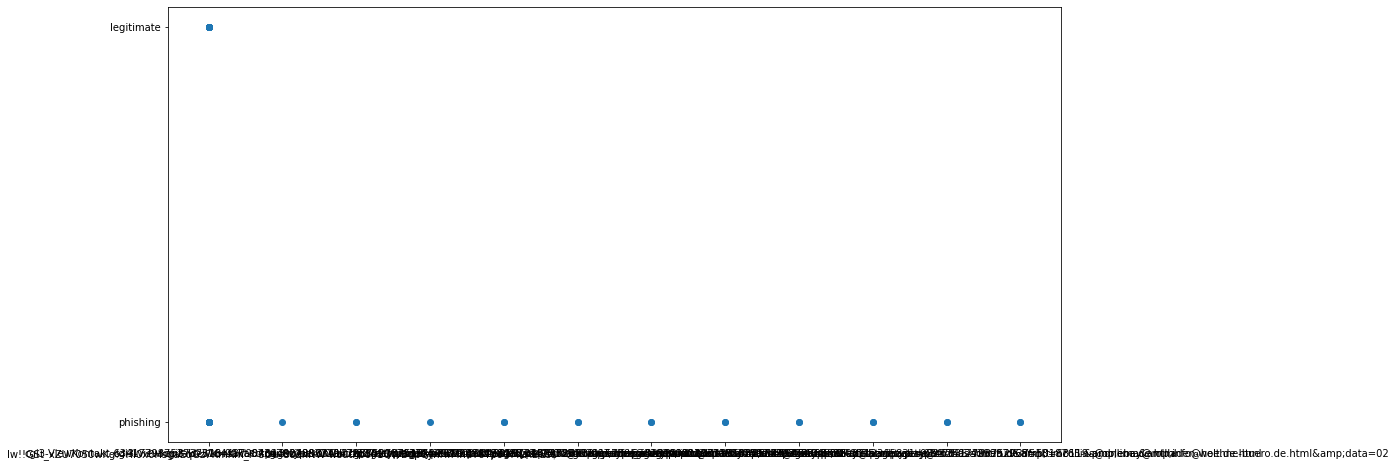

----------------------------------------------------------------------------------------------------


In [141]:
plot_scatter('url_params', 'status')

Select Feature

In [121]:

# train data frame
df = df.drop(one_val_cols, axis=1)
df[to_lower_cols] = pd.Series(df[to_lower_cols].values.flatten()).str.lower()
df[str_to_num_cols] = df[str_to_num_cols].replace({'zero': 0, 'one': 1}).astype('int64')

# test data frame
test_df = test_df.drop(one_val_cols, axis=1)
test_df[to_lower_cols] = pd.Series(test_df[to_lower_cols].values.flatten()).str.lower()
test_df[str_to_num_cols] = test_df[str_to_num_cols].replace({'zero': 0, 'one': 1}).astype('int64')

In [122]:
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,...,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,nb_extCSS,ratio_extRedirection,ratio_extErrors,login_form,external_favicon,links_in_tags,ratio_intMedia,ratio_extMedia,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status,url_scheme,url_netloc,url_path,url_params,url_query,url_fragment
0,http://www.progarchives.com/album.asp?id=61737,46,20,0,3,0,0,1,0,1,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.108696,0.000000,0,0,0,0,0,3,0,0,0,0,0,0,6,...,3.750000,0,0,0,0,0,0,143,0.930070,0.069930,1,0.000000,0.0,0,1,73.913043,100.000000,0.000000,0,0,77.777778,0,0,0,1,one,0,627,6678,78526,0,0,5,phishing,http,www.progarchives.com,/album.asp,,id=61737,
1,http://signin.eday.co.uk.ws.edayisapi.dllsign....,128,120,0,10,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,1,0.054688,0.058333,0,0,0,0,0,3,0,0,0,0,0,0,10,...,0.000000,2,0,0,0,0,0,0,0.000000,0.000000,0,0.000000,0.0,0,0,0.000000,0.000000,0.000000,0,0,0.000000,0,0,1,1,zero,0,300,65,0,0,1,0,phishing,http,signin.eday.co.uk.ws.edayisapi.dllsign.inusing...,/,,,
2,http://www.avevaconstruction.com/blesstool/ima...,52,25,0,3,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,3,0,0,0,0,1,0,5,...,5.666667,0,0,0,0,0,0,3,1.000000,0.000000,0,0.000000,0.0,0,0,100.000000,0.000000,0.000000,0,0,0.000000,0,0,0,1,zero,0,119,1707,0,0,1,0,phishing,http,www.avevaconstruction.com,/blesstool/image.htm,,,
3,http://www.jp519.com/,21,13,0,2,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.142857,0.230769,0,0,0,0,0,2,0,1,0,0,0,0,2,...,0.000000,0,0,0,0,0,0,404,0.962871,0.037129,0,0.133333,0.0,0,0,100.000000,92.307692,7.692308,0,0,82.539683,0,0,0,1,one,0,130,1331,0,0,0,0,legitimate,http,www.jp519.com,/,,,
4,https://www.velocidrone.com/,28,19,0,2,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,0,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,0,0,2,...,0.000000,0,0,0,0,0,0,57,0.684211,0.315789,3,0.000000,0.0,0,1,55.555556,50.000000,50.000000,0,0,81.081081,0,0,0,0,zero,0,164,1662,312044,0,0,4,legitimate,https,www.velocidrone.com,/,,,


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11481 entries, 0 to 11480
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11481 non-null  object 
 1   length_url                  11481 non-null  int64  
 2   length_hostname             11481 non-null  int64  
 3   ip                          11481 non-null  int64  
 4   nb_dots                     11481 non-null  int64  
 5   nb_hyphens                  11481 non-null  int64  
 6   nb_at                       11481 non-null  int64  
 7   nb_qm                       11481 non-null  int64  
 8   nb_and                      11481 non-null  int64  
 9   nb_eq                       11481 non-null  int64  
 10  nb_underscore               11481 non-null  int64  
 11  nb_tilde                    11481 non-null  int64  
 12  nb_percent                  11481 non-null  int64  
 13  nb_slash                    114

In [124]:
for col in df.columns:
    print(f'{col}\nNum of unique value: {df[col].nunique()}\n{df[col].value_counts()}\n{100*"-"}')

url
Num of unique value: 8000
http://e710z0ear.du.r.appspot.com/c:/users/user/downlo                                                                              3
http://www.thefreedictionary.com/black+letter                                                                                       2
https://test.bayoucitybadges.org/                                                                                                   2
http://www.neutralsources.com/-/re.html                                                                                             2
http://www.fornasetti.com/                                                                                                          2
                                                                                                                                   ..
http://www.enext.mn/en/newonenote/login.php                                                                                         1
https://www.bp-atualiza-app.com/

Visualize Data

In [125]:
def plot_scatter(label, target):    
    plt.figure(figsize=(16, 8))
    print(label)
    plt.scatter(df[label], df[target])
    plt.show()
    print(100*'-')

In [126]:
# for col in df.columns:
#     if col != 'url' and col != 'status':
#         plot_scatter(col, 'status')

Label Encode

In [127]:
df = df.drop(['url'], axis=1)
test_df = test_df.drop(['url'], axis=1)

In [128]:
df['domain_with_copyright'] = pd.Series(df['domain_with_copyright'].values.flatten()).map({'zero': 0, 'one': 1})
test_df['domain_with_copyright'] = pd.Series(test_df['domain_with_copyright'].values.flatten()).map({'zero': 0, 'one': 1})

In [129]:
X = df.drop(['status'], axis=1).values
y = df['status'].values

In [130]:
X_test = test_df.values

In [131]:
from sklearn.preprocessing import LabelEncoder

In [132]:
enc = LabelEncoder()
y = enc.fit_transform(y)

Train / Valid Split Data

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=1)

In [138]:
# enc = LabelEncoder()
# X_train = enc.fit_transform(X_train)
# X_valid = enc.transform(X_valid)
# X_test = enc.transform(X_test)

TypeError: ignored

Scale data

In [135]:
from sklearn.preprocessing import StandardScaler

In [136]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

ValueError: ignored

In [ ]:
X_train.shape

(8610, 81)

### Use NN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
i = Input(shape=(X_train.shape[1],))
x = Dense(64, activation='relu')(i)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

In [ ]:
model = Model(i, x)
model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 81)]              0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                5248      
_________________________________________________________________
dense_17 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 33        
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
r = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
270/270 [==============================] - 1s 2ms/step - loss: 0.2224 - accuracy: 0.9100 - val_loss: 55901.4883 - val_accuracy: 0.4162
Epoch 2/20
270/270 [==============================] - 0s 2ms/step - loss: 0.1152 - accuracy: 0.9578 - val_loss: 112962.9062 - val_accuracy: 0.4197
Epoch 3/20
270/270 [==============================] - 0s 2ms/step - loss: 0.0927 - accuracy: 0.9695 - val_loss: 9189.9893 - val_accuracy: 0.4779
Epoch 4/20
270/270 [==============================] - 0s 2ms/step - loss: 0.0753 - accuracy: 0.9743 - val_loss: 14465.7695 - val_accuracy: 0.4862
Epoch 5/20
270/270 [==============================] - 0s 2ms/step - loss: 0.0656 - accuracy: 0.9776 - val_loss: 42086.2578 - val_accuracy: 0.4434
Epoch 6/20
270/270 [==============================] - 0s 2ms/step - loss: 0.0563 - accuracy: 0.9805 - val_loss: 143431.6719 - val_accuracy: 0.4333
Epoch 7/20
270/270 [==============================] - 0s 2ms/step - loss: 0.0469 - accuracy: 0.9846 - val_loss: 130091.2344

### NN evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
y_pred_valid = np.round(model.predict(X_valid))
y_pred_valid

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

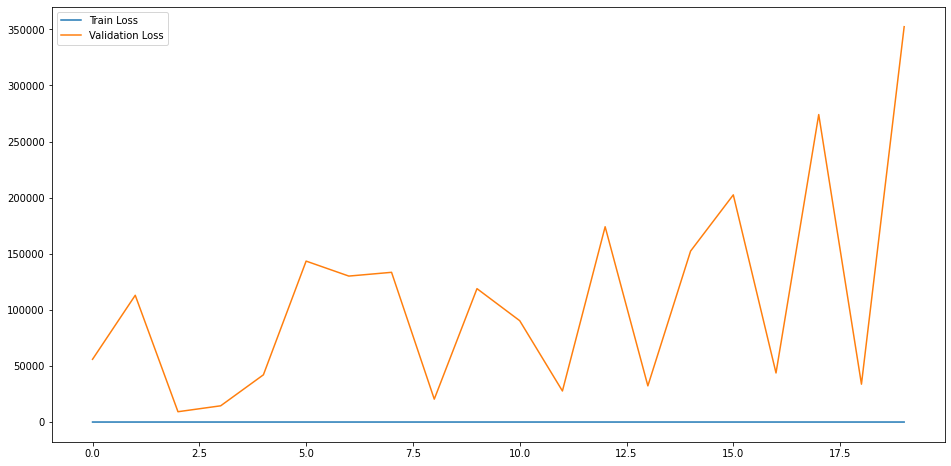

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(r.history['loss'], label='Train Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

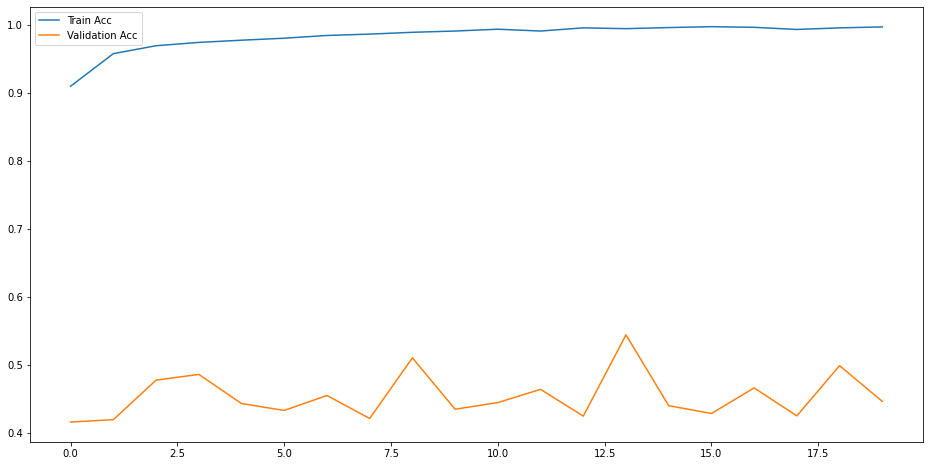

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(r.history['accuracy'], label='Train Acc')
plt.plot(r.history['val_accuracy'], label='Validation Acc')
plt.legend()
plt.show()

In [ ]:
def plot_confusion_matrix(y_test, y_pred, title):
    plt.figure(figsize=(16, 8))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, linewidths=0.5)
    plt.title(title)
    plt.show()

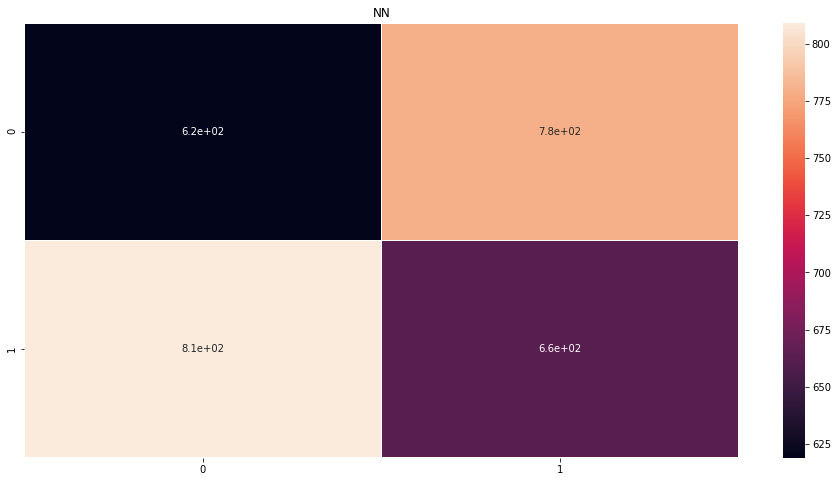

In [ ]:
plot_confusion_matrix(y_valid, y_pred_valid, 'NN')

In [ ]:
print(classification_report(y_valid, y_pred_valid))

              precision    recall  f1-score   support

           0       0.43      0.44      0.44      1399
           1       0.46      0.45      0.45      1472

    accuracy                           0.45      2871
   macro avg       0.45      0.45      0.45      2871
weighted avg       0.45      0.45      0.45      2871



### Model train

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier, plot_tree, plot_importance

In [ ]:
dt = DecisionTreeClassifier()
svc = SVC(probability=True)
ada_dt = AdaBoostClassifier(base_estimator=dt)
ada_svc = AdaBoostClassifier(base_estimator=svc, n_estimators=10, random_state=0, learning_rate=0.3)
gbm = GradientBoostingClassifier()
xgb = XGBClassifier()
rf = RandomForestClassifier(criterion='entropy', max_leaf_nodes=20, oob_score=True, n_jobs=-1)

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
ada_dt.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [ ]:
# ada_svc.fit(X_train, y_train)

In [ ]:
gbm.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=20, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

### Model Evaluation

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score
from sklearn.feature_selection import SelectFromModel

In [ ]:
y_pred_dt = dt.predict(X_valid)
y_pred_svc = svc.predict(X_valid)
y_pred_ada_dt = ada_dt.predict(X_valid)
# y_pred_ada_svc = ada_svc.predict(X_valid)
y_pred_gbm = gbm.predict(X_valid)
y_pred_xgb = xgb.predict(X_valid)
y_pred_rf = rf.predict(X_valid)

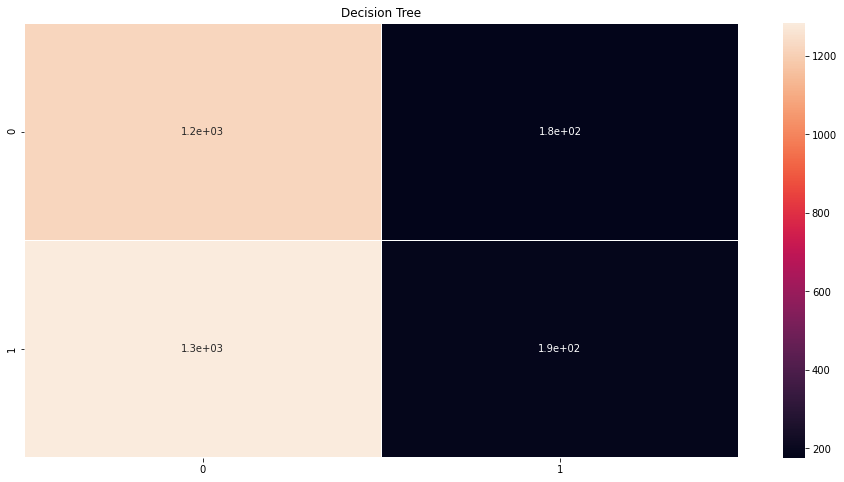

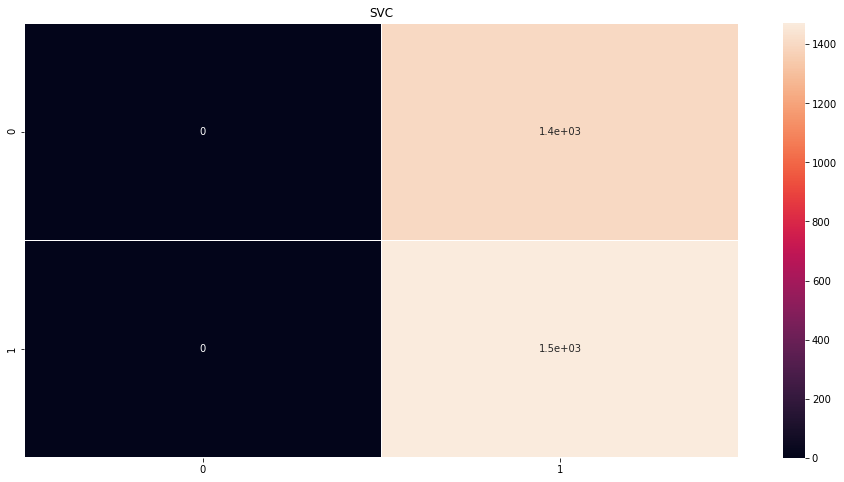

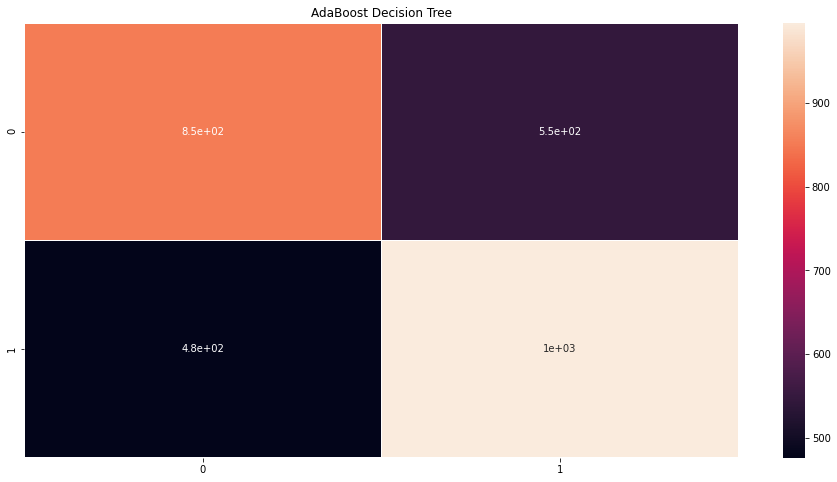

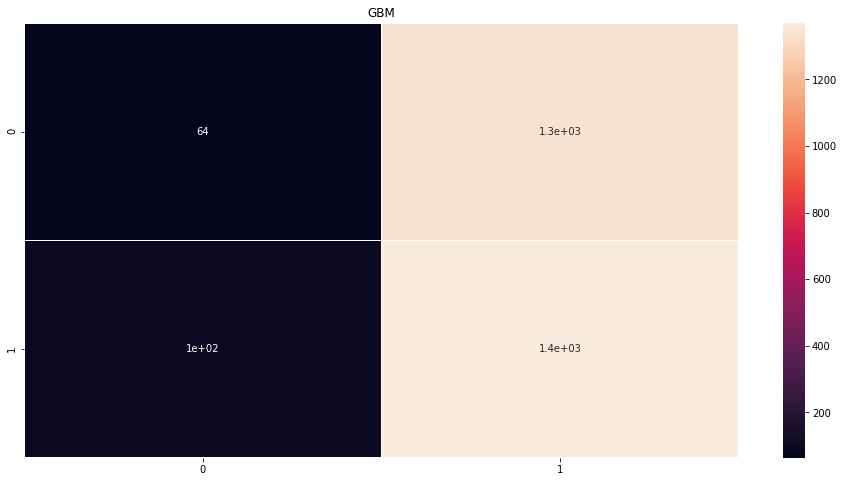

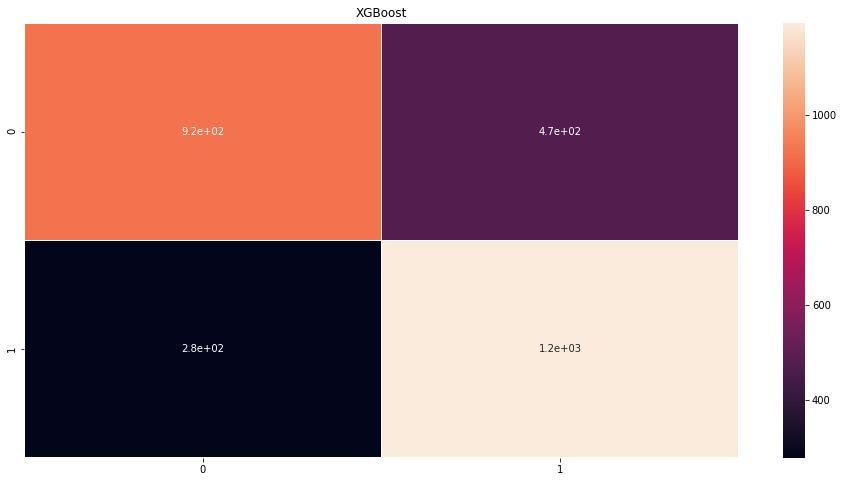

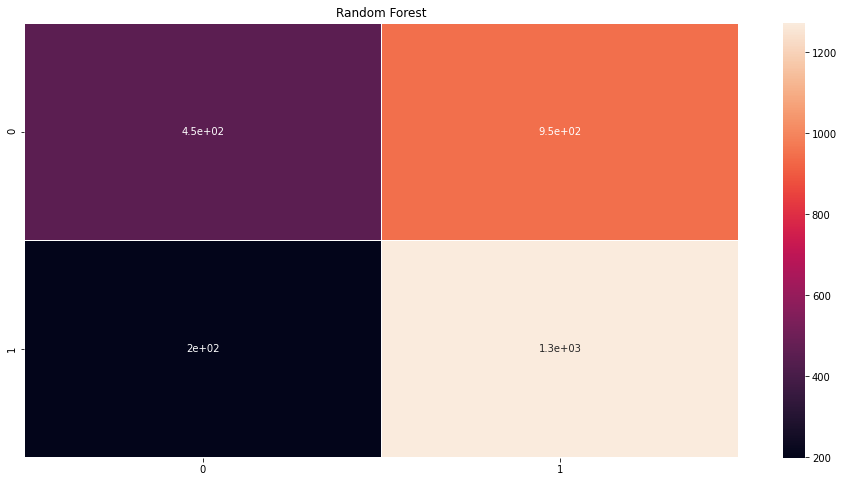

In [ ]:
plot_confusion_matrix(y_valid, y_pred_dt, 'Decision Tree')
plot_confusion_matrix(y_valid, y_pred_svc, 'SVC')
plot_confusion_matrix(y_valid, y_pred_ada_dt, 'AdaBoost Decision Tree')
# plot_confusion_matrix(y_valid, y_pred_ada_svc, 'AdaBoost SVC')
plot_confusion_matrix(y_valid, y_pred_gbm, 'GBM')
plot_confusion_matrix(y_valid, y_pred_xgb, 'XGBoost')
plot_confusion_matrix(y_valid, y_pred_rf, 'Random Forest')

In [ ]:
def print_classification_report(y_test, y_pred, title):
    print(title)
    print(classification_report(y_test, y_pred))
    print(100*'-')

In [ ]:
print_classification_report(y_valid, y_pred_dt, 'Decision Tree')
print_classification_report(y_valid, y_pred_svc, 'SVC')
print_classification_report(y_valid, y_pred_ada_dt, 'AdaBoost Decision Tree')
# print_classification_report(y_valid, y_pred_ada_svc, 'AdaBoost SVC')
print_classification_report(y_valid, y_pred_gbm, 'GBM')
print_classification_report(y_valid, y_pred_xgb, 'XGBoost')
print_classification_report(y_valid, y_pred_rf, 'Random Forest')

Decision Tree
              precision    recall  f1-score   support

           0       0.49      0.87      0.63      1399
           1       0.52      0.13      0.20      1472

    accuracy                           0.49      2871
   macro avg       0.50      0.50      0.42      2871
weighted avg       0.50      0.49      0.41      2871

----------------------------------------------------------------------------------------------------
SVC
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1399
           1       0.51      1.00      0.68      1472

    accuracy                           0.51      2871
   macro avg       0.26      0.50      0.34      2871
weighted avg       0.26      0.51      0.35      2871

----------------------------------------------------------------------------------------------------
AdaBoost Decision Tree
              precision    recall  f1-score   support

           0       0.64      0.61      0.63     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
acc = [dt.score(X_valid, y_valid), svc.score(X_valid, y_valid), ada_dt.score(X_valid, y_valid, gbm.score(X_valid, y_valid), xgb.score(X_valid, y_valid), rf.score(X_valid, y_valid)]
label = ['DT', 'SVC', 'AdaDT', 'GBM', 'XGB', 'RF']
idx = np.arange(len(label))

SyntaxError: ignored

In [ ]:
plt.figure(figsize=(16, 8))
plt.bar(idx, acc)
plt.xticks(idx, label, rotation=90, c='w')
plt.xlabel('Model', c='w')
plt.ylabel('Accuracy', c='w')
plt.show()

### Predictions Based on Data Explorations

In [147]:
pred = test_df['url_params'] != ''

0       False
1       False
2       False
3       False
4       False
        ...  
3424    False
3425    False
3426    False
3427    False
3428    False
Name: url_params, Length: 3429, dtype: bool

In [148]:
pred_df = pd.DataFrame({
    'prediction': pred
})

In [149]:
pred_df['prediction'] = pd.Series(pred_df['prediction'].values.flatten()).map({False: 'legitimate', True:'phishing'})

In [152]:
pred_df.to_csv('wppd_pred.csv', index=False)
from google.colab import files
files.download('wppd_pred.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>